<a href="https://colab.research.google.com/github/Julian-mrq/AI-trading-bots/blob/main/FBProphet_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [1]:
!pip install streamlit
!pip install prophet
!pip install plotly

import streamlit as st
import datetime
import yfinance as yf
from types import SimpleNamespace
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 477.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


**Parameters**

In [2]:
params = SimpleNamespace(
    stock = 'NFLX',                           # Stock symbol
    start = '2017-01-01',                   # Start date of data
    end = datetime.date.today(),            # End date of data
    test_size = 0.25,                       # Test size for data split
    optimizer = 'adam',                     # Model optimizer
    loss = 'mean_squared_error',            # Loss type
    forecast_time = 365                     # Number of days to predict
  )

In [3]:
data = yf.download(
    params.stock,
    start=params.start,
    end=params.end
    )
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
train = data.iloc[:len(data)-params.forecast_time]
test = data.iloc[len(data)-params.forecast_time:]

train = train[['Date', 'Close']]
train = train.rename(columns={'Date': 'ds', 'Close':'y'})

m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=params.forecast_time)
forecast = m.predict(future)

predictions = forecast.iloc[-params.forecast_time:]['yhat']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruf8ynuc/eooq15vl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruf8ynuc/lqjhk_qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74318', 'data', 'file=/tmp/tmpruf8ynuc/eooq15vl.json', 'init=/tmp/tmpruf8ynuc/lqjhk_qu.json', 'output', 'file=/tmp/tmpruf8ynuc/prophet_modelmo434gem/prophet_model-20241005143505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Error**

In [5]:
rmse = np.sqrt(mean_squared_error(y_true=test['Close'], y_pred=predictions))
print(f'RMSE = {rmse:2.2f}')

RMSE = 446.77


In [6]:
figure = plot_plotly(m, forecast)
figure.show() # st.plotly_chart(figure) pour streamlit

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

2024-10-05 14:35:07.222 WARNING streamlit.runtime.scriptrunner_utils.script_run_context:

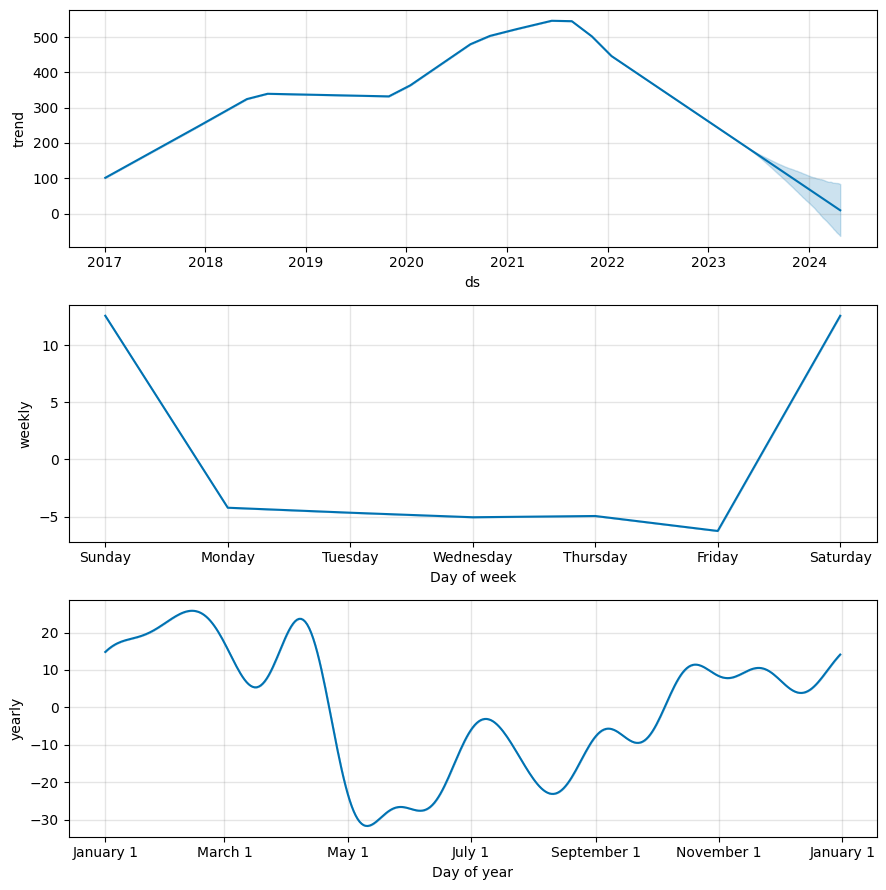

In [7]:
components = m.plot_components(forecast)
st.write(components)